In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.5, style='whitegrid')

from cvx.retirement.visualize import plot_ecdf

# Returns

In [2]:
ret_adj_B = pd.read_csv('cache/ret_adj_B.csv', index_col=0).squeeze()
ret_adj_I = pd.read_csv('cache/ret_adj_I.csv', index_col=0).squeeze()
ret_adj_R = pd.read_csv('cache/ret_adj_R.csv', index_col=0).squeeze()

ret_adj_B_collar = pd.read_csv('cache/ret_adj_B_collar.csv', index_col=0).squeeze()
ret_adj_I_collar = pd.read_csv('cache/ret_adj_I_collar.csv', index_col=0).squeeze()
ret_adj_R_collar = pd.read_csv('cache/ret_adj_R_collar.csv', index_col=0).squeeze()

<Figure size 1000x600 with 0 Axes>

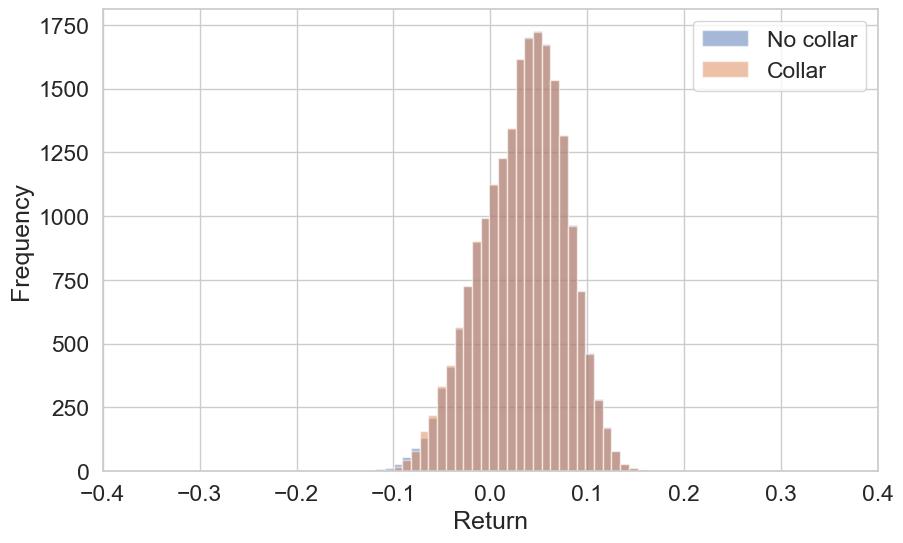

<Figure size 1000x600 with 0 Axes>

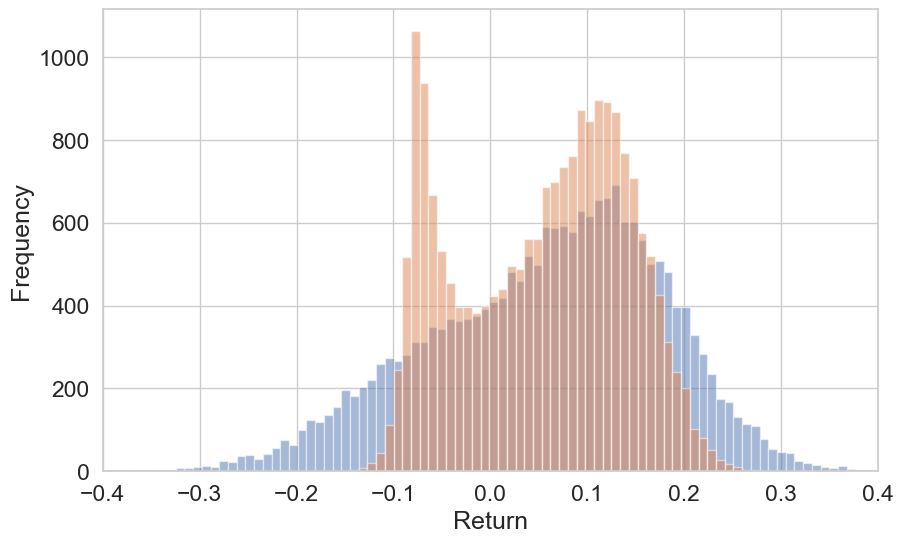

<Figure size 1000x600 with 0 Axes>

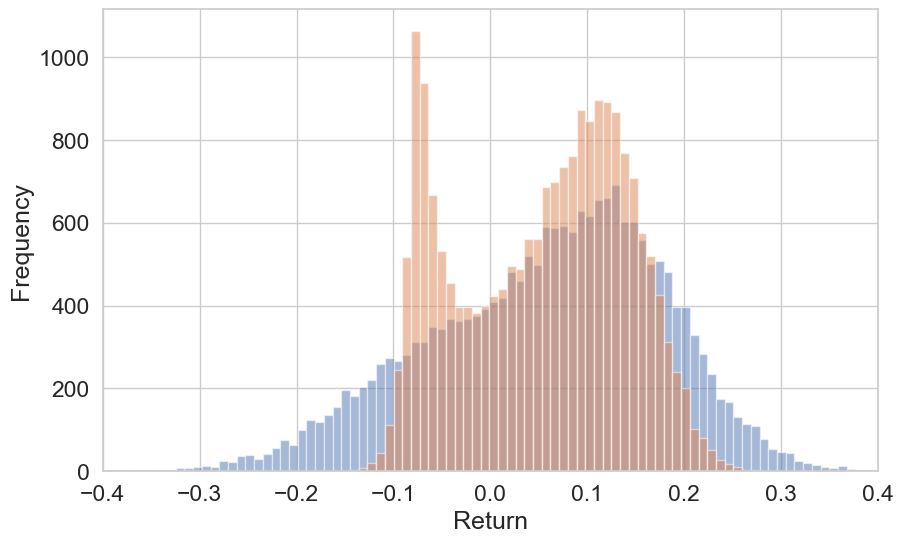

In [3]:
save = False

def histogram(data1, data2, data_min, data_max, num_bins):
    # Compute a common range for both datasets


    # Define bin edges with a fixed width
    bins = np.linspace(data_min, data_max, num_bins + 1)  # +1 to get num_bins intervals

    # Plot histograms with shared bin edges
    plt.figure(figsize=(10, 6))
    plt.hist(data1, bins=bins, alpha=0.5, label='No collar')
    plt.hist(data2, bins=bins, alpha=0.5, label='Collar')
    plt.xlim(-0.4, 0.4)

    plt.legend()
    plt.xlabel('Return')
    plt.ylabel('Frequency')

data_min = min(ret_adj_R.min(), ret_adj_R_collar.min())
data_max = max(ret_adj_R.max(), ret_adj_R_collar.max())

plt.figure(figsize=(10, 6))
histogram(ret_adj_B, ret_adj_B_collar, data_min, data_max, num_bins=100)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/ret_adj_B.png', bbox_inches='tight')

plt.figure(figsize=(10, 6))
histogram(ret_adj_I, ret_adj_I_collar, data_min, data_max, num_bins=100)
plt.legend().remove()
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/ret_adj_I.png', bbox_inches='tight')

plt.figure(figsize=(10, 6))
histogram(ret_adj_R, ret_adj_R_collar, data_min, data_max, num_bins=100)
plt.legend().remove()
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/ret_adj_R.png', bbox_inches='tight');

# Upper middle class retiree

In [4]:
bequests = pd.read_csv('cache/MPC_upper_bequests.csv', index_col=0).squeeze()
cash = pd.read_csv('cache/MPC_upper_cash.csv', index_col=0).squeeze()
bequests_collar = pd.read_csv('cache/MPC_upper_bequests_collar.csv', index_col=0).squeeze()
cash_collar = pd.read_csv('cache/MPC_upper_cash_collar.csv', index_col=0).squeeze()

assert bequests.shape == bequests_collar.shape
assert cash.shape == cash_collar.shape

print((cash / cash_collar).quantile([0., 0.01, 0.05, 0.5, 0.95, 0.99, 1.]).round(2))
print((bequests / bequests_collar).quantile([0., 0.01, 0.05, 0.5, 0.95, 0.99, 1.]).round(2))

0.00    0.76
0.01    0.95
0.05    1.00
0.50    1.00
0.95    1.00
0.99    1.00
1.00    1.37
Name: 0, dtype: float64
0.00     0.06
0.01     0.14
0.05     0.36
0.50     1.00
0.95     1.92
0.99     3.22
1.00    42.51
Name: 0, dtype: float64


0.00       9.17
0.01      43.83
0.05     129.96
0.25     540.93
0.50     830.25
0.75    1464.41
0.95    3447.71
0.99    5261.67
1.00    8221.74
Name: 0, dtype: float64
0.00       2.15
0.01     122.63
0.05     323.19
0.25     600.05
0.50     824.76
0.75    1288.16
0.95    2641.99
0.99    4217.28
1.00    7022.30
Name: 0, dtype: float64


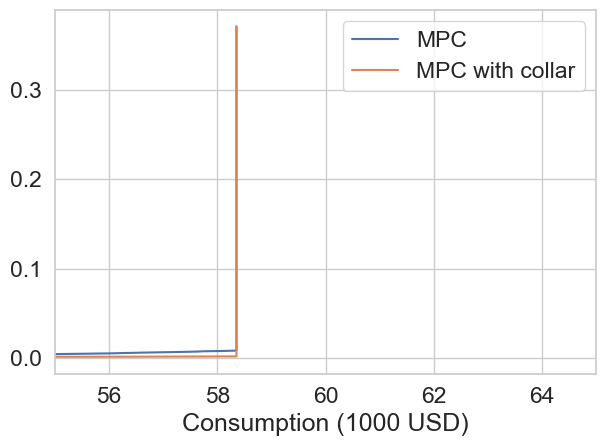

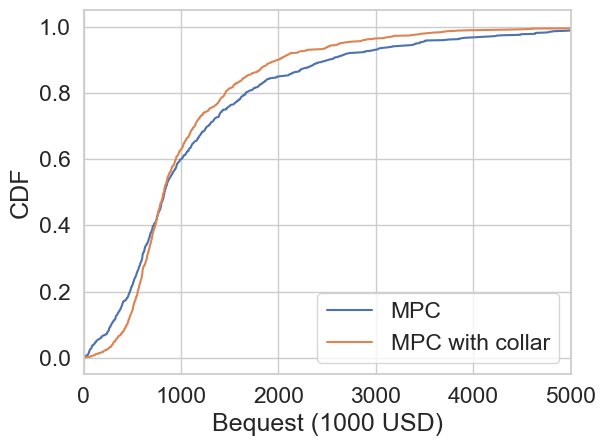

In [5]:
save = False
plot_ecdf(cash, label='MPC')
plot_ecdf(cash_collar, label='MPC with collar')
plt.xlim(55, 65)
plt.xlabel('Consumption (1000 USD)')
plt.legend()
plt.tight_layout()
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/consumption_CDF_{save}.png', bbox_inches='tight')

plt.figure()
plot_ecdf(bequests, label='MPC')
plot_ecdf(bequests_collar, label='MPC with collar')
plt.xlim(0, 5000)
plt.xlabel('Bequest (1000 USD)')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()

if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/bequest_CDF_{save}.png', bbox_inches='tight')



print(bequests.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))
print(bequests_collar.quantile([0., 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.]).round(2))

# Lower middle class retiree

In [6]:
bequests = pd.read_csv('cache/MPC_lower_bequests.csv', index_col=0).squeeze()
cash = pd.read_csv('cache/MPC_lower_cash.csv', index_col=0).squeeze()
bequests_collar = pd.read_csv('cache/MPC_lower_bequests_collar.csv', index_col=0).squeeze()
cash_collar = pd.read_csv('cache/MPC_lower_cash_collar.csv', index_col=0).squeeze()

assert bequests.shape == bequests_collar.shape
assert cash.shape == cash_collar.shape

print((cash / cash_collar).quantile([0., 0.01, 0.05, 0.5, 0.95, 0.99, 1.]).round(2))
print((bequests / bequests_collar).quantile([0., 0.01, 0.05, 0.5, 0.95, 0.99, 1.]).round(2))


0.00    0.9
0.01    1.0
0.05    1.0
0.50    1.0
0.95    1.0
0.99    1.0
1.00    1.0
Name: 0, dtype: float64
0.00    0.31
0.01    0.49
0.05    0.61
0.50    1.00
0.95    1.59
0.99    2.12
1.00    4.78
Name: 0, dtype: float64


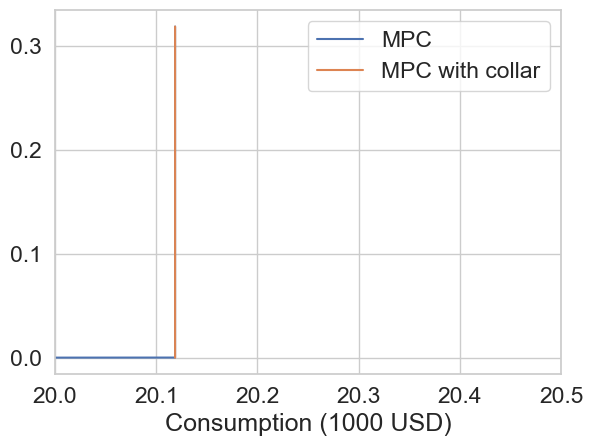

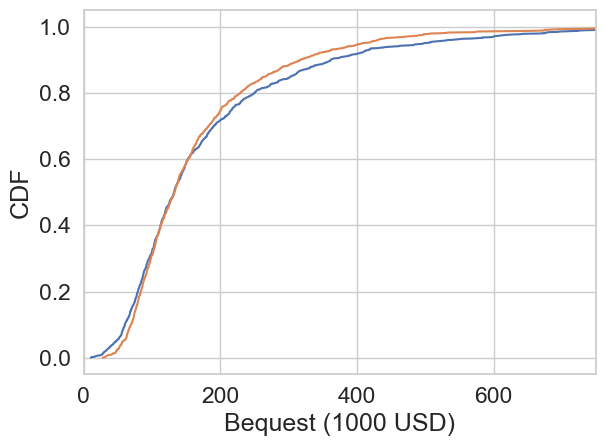

In [8]:
save = 'lower_collar'
plot_ecdf(cash, label='MPC')
plot_ecdf(cash_collar, label='MPC with collar')
plt.xlim(20, 20.5)
plt.xlabel('Consumption (1000 USD)')
plt.legend()
plt.tight_layout()
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/consumption_CDF_{save}.png', bbox_inches='tight')

plt.figure()
plot_ecdf(bequests, label='MPC')
plot_ecdf(bequests_collar, label='MPC with collar')
plt.xlim(0, 750)
plt.xlabel('Bequest (1000 USD)')
plt.ylabel('CDF')
plt.tight_layout()
# plt.xlim(0,100)
# plt.ylim(0,0.2)
if save:
    plt.savefig(f'/Users/kasper/Documents/Stanford/Research/My papers/retirement/retirement-paper/figures/bequest_CDF_{save}.png', bbox_inches='tight')
